# Analysis of results

- after running `run_eval.sh` with at least 1 model

In [1]:
from analysis_tools import read_all_results, plot_accuracy

In [2]:
base_folder = "../results"

In [3]:
all_dfs = read_all_results(base_folder)

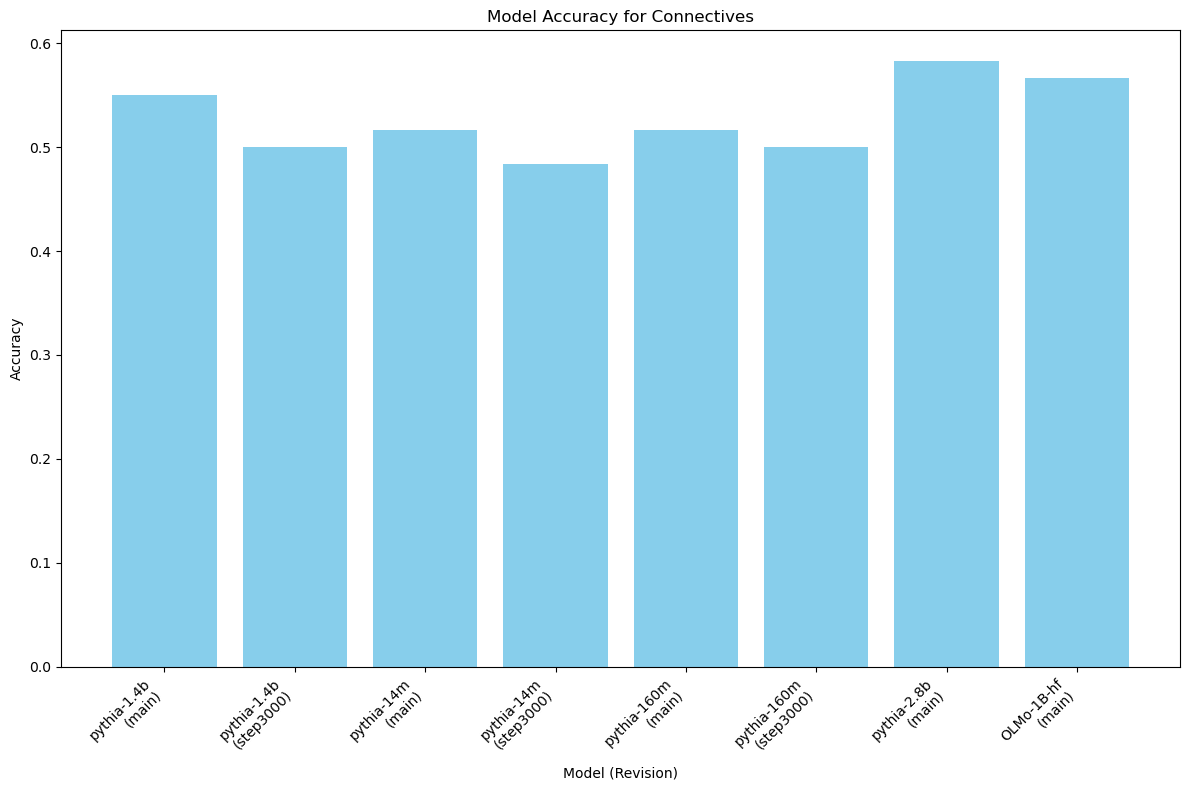

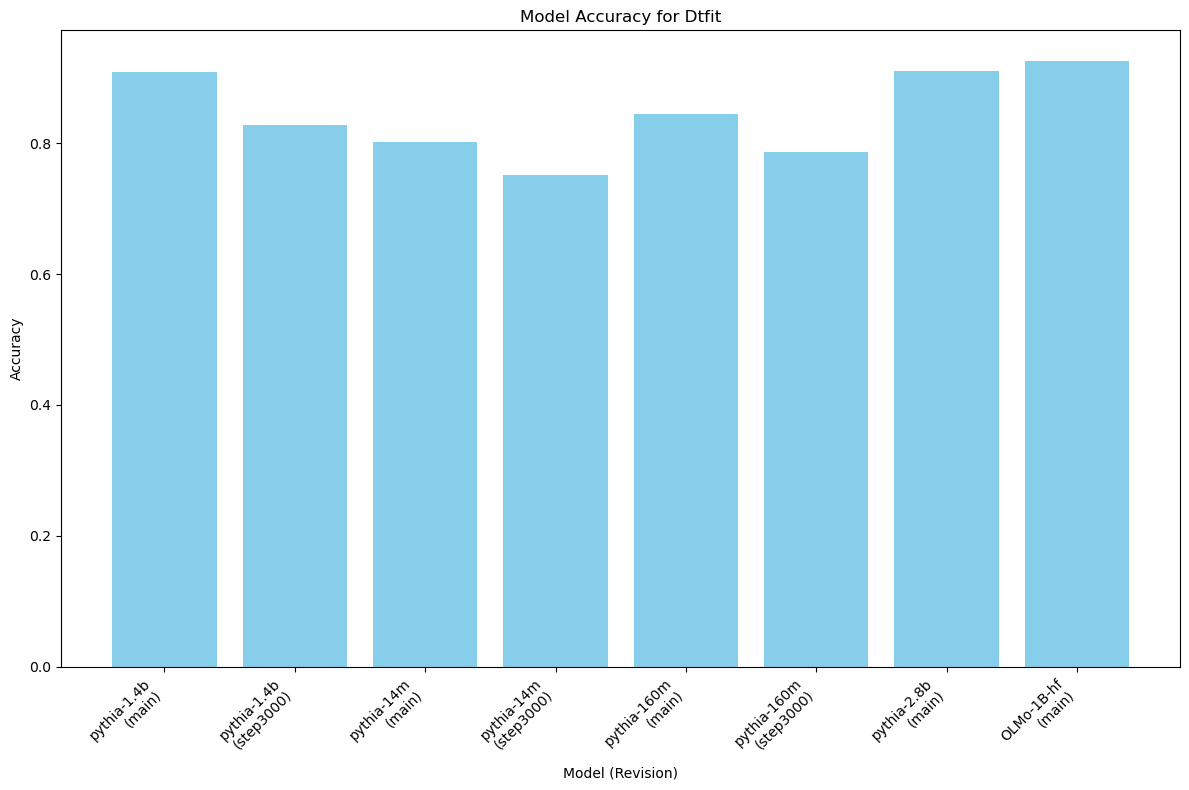

In [4]:
plot_accuracy(all_dfs)